In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
import pickle
from mix_Network import *

%mkdir -p ../Records
%mkdir -p ../Records/EXP_03_NMNIST

# Testing HOTS on N-MNIST with Lagorce 2017 methodology

- loading 15 random digits instead of 3 cycles with 5 digits for learning clusters

In [3]:
hots = network(krnlinit='first', tau=1, homeo=False)
loader, order = hots.learning1by1()

none
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


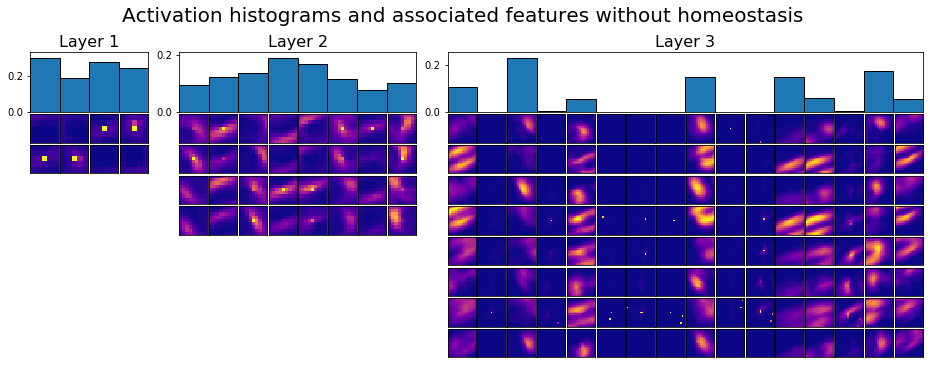

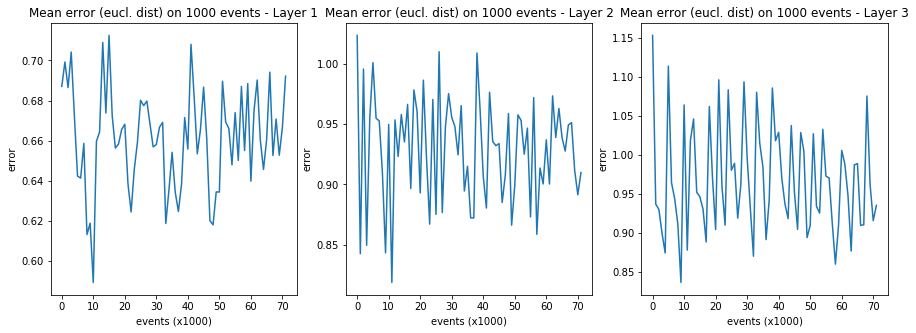

In [4]:
hots.plotlayer()
hots.plotconv()

In [5]:
trainmap, loader, _  = hots.running(loader, order)
testmap, loader, _  = hots.running(loader, order)

In [6]:
histoscore(trainmap,testmap)

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 77.8% - eucli = 75.2% - norm = 75.0%
Classification scores with kNN: 3-NN = 74.4% - 6-NN = 75.6%
Classification scores with entropy: Kullback-Leibler = 76.2% - Jensen-Shannon = 78.2%
----------------------------------------------------------------------------------------------------


## Adding Homeostasis

none
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


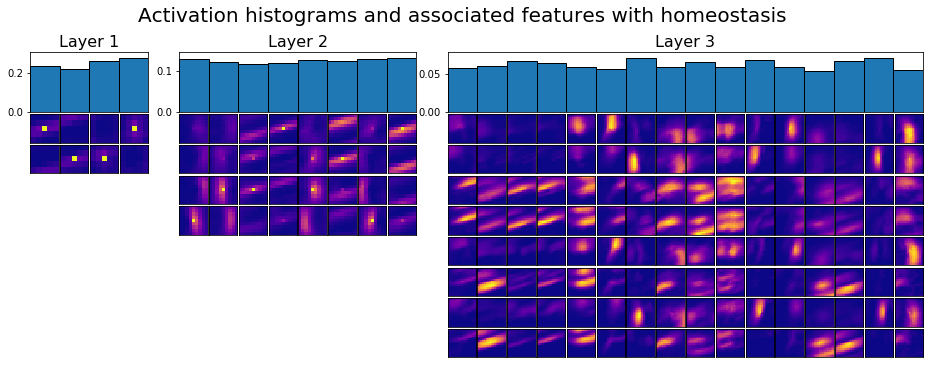

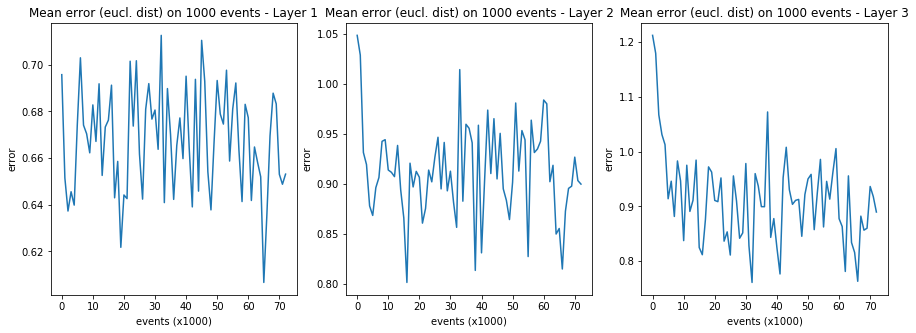

In [7]:
homhots = network(krnlinit='first', tau=1, homeo=True)
loaderhom, order = homhots.learning1by1()
homhots.plotlayer()
homhots.plotconv()

In [8]:
trainmaphom, loaderhom, _  = homhots.running(loaderhom, order)
testmaphom, loaderhom, _  = homhots.running(loaderhom, order)
histoscore(trainmaphom,testmaphom)


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 77.2% - eucli = 76.6% - norm = 76.2%
Classification scores with kNN: 3-NN = 77.8% - 6-NN = 79.80000000000001%
Classification scores with entropy: Kullback-Leibler = 77.2% - Jensen-Shannon = 77.2%
----------------------------------------------------------------------------------------------------


### Classification without homeostasis

In [9]:
for i in range(len(homhots.L)):
    homhots.L[i].homeo=False
trainmaphom, loader, _  = homhots.running(loader, order)
testmaphom, loader, _  = homhots.running(loader, order)
histoscore(trainmaphom,testmaphom)


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 76.4% - eucli = 75.4% - norm = 75.4%
Classification scores with kNN: 3-NN = 74.6% - 6-NN = 74.4%
Classification scores with entropy: Kullback-Leibler = 77.0% - Jensen-Shannon = 75.8%
----------------------------------------------------------------------------------------------------


# Random initialisation of the kernels

none
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


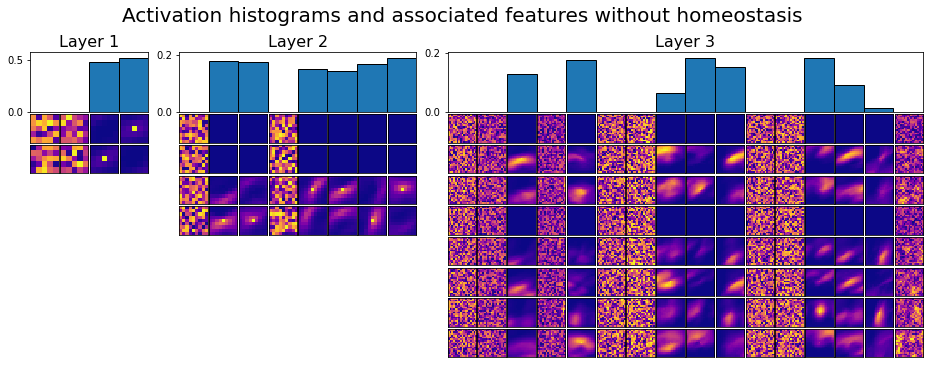

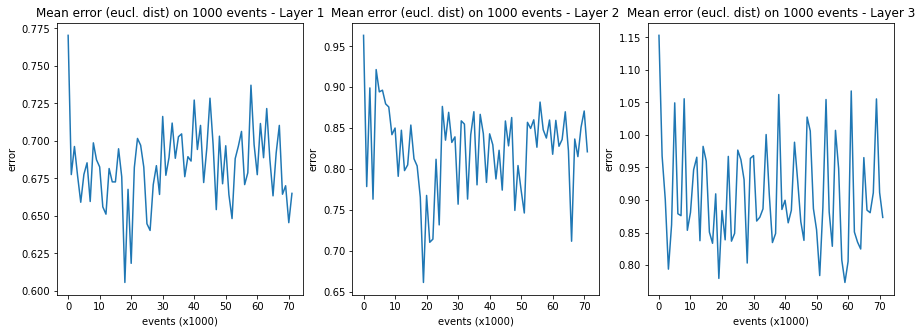

In [14]:
hots = network(krnlinit='rdn', tau=1)
loader, order = hots.learning1by1()
hots.plotlayer()
hots.plotconv()

In [20]:
trainmap, loader, _  = hots.running(loader, order)

In [21]:
testmap, loader, _  = hots.running(loader, order)
histoscore(trainmap,testmap)


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 63.0% - eucli = 60.6% - norm = 60.0%
Classification scores with kNN: 3-NN = 60.199999999999996% - 6-NN = 60.8%
Classification scores with entropy: Kullback-Leibler = 63.0% - Jensen-Shannon = 62.8%
----------------------------------------------------------------------------------------------------


## Adding Homeostasis

none
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


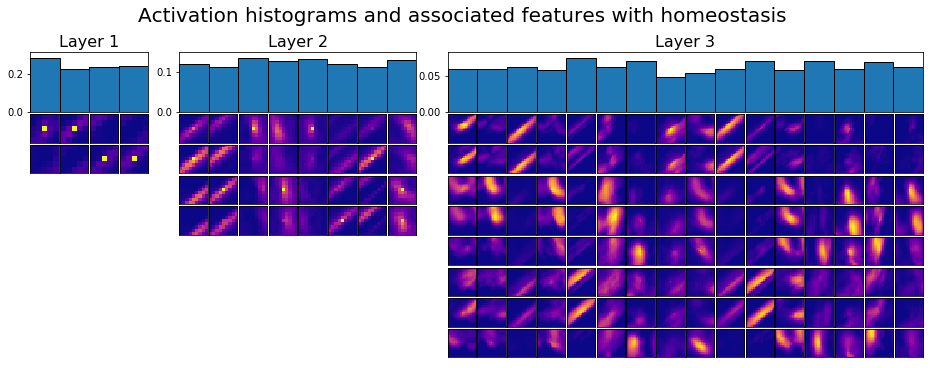

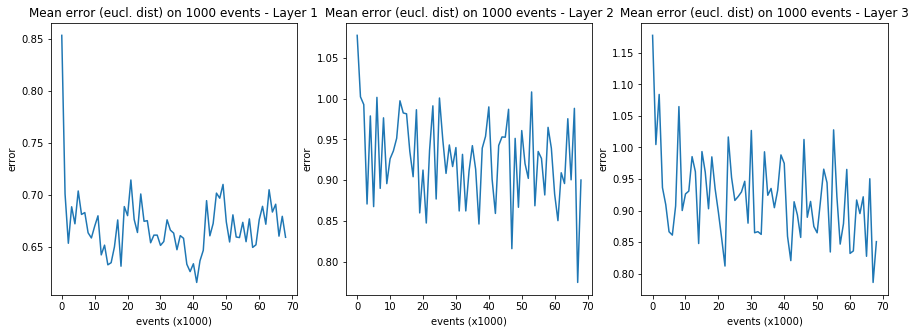

In [12]:
homhots = network(krnlinit='rdn', tau=1, homeo=True)
loaderhom, order = homhots.learning1by1()
homhots.plotlayer()
homhots.plotconv()

In [13]:
trainmaphom, loaderhom, _  = homhots.running(loaderhom, order)
testmaphom, loaderhom, _ = homhots.running(loaderhom, order)
histoscore(trainmaphom,testmaphom)


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 70.0% - eucli = 68.60000000000001% - norm = 68.60000000000001%
Classification scores with kNN: 3-NN = 66.8% - 6-NN = 67.2%
Classification scores with entropy: Kullback-Leibler = 69.8% - Jensen-Shannon = 70.0%
----------------------------------------------------------------------------------------------------


### Classification without homeostasis

In [14]:
for i in range(len(homhots.L)):
    homhots.L[i].homeo=False
trainmaphom2, loaderhom, _  = homhots.running(loaderhom, order)
testmaphom2, loaderhom, _  = homhots.running(loaderhom, order)
histoscore(trainmaphom2,testmaphom2)


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 73.0% - eucli = 71.0% - norm = 71.6%
Classification scores with kNN: 3-NN = 70.8% - 6-NN = 73.4%
Classification scores with entropy: Kullback-Leibler = 72.39999999999999% - Jensen-Shannon = 73.2%
----------------------------------------------------------------------------------------------------
